# KNN Breast Cancer 

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [72]:
cancer = pd.read_csv('data.csv')

From running our SVM model we know that we have to remove the "Unnamed: 32" column 

In [73]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [74]:
cancer.drop(['Unnamed: 32','id'],axis=1, inplace=True)

From SVM we also know we need to dissociate diagnosis column

In [75]:
wod=cancer.drop('diagnosis',axis=1)
wod.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Importing the packages needed to being running machine learing algorthim

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
s_scaled=StandardScaler()

In [78]:
x=pd.DataFrame(s_scaled.fit_transform(wod),columns=wod.columns)
x.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


Change diagnosis column M and B to 0 and 1 for scaling

In [79]:
y=cancer['diagnosis'].map({'M':0,'B':1}).astype(int)
y.tail()

564    0
565    0
566    0
567    0
568    1
Name: diagnosis, dtype: int64

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Text(0, 0.5, 'Error rate')

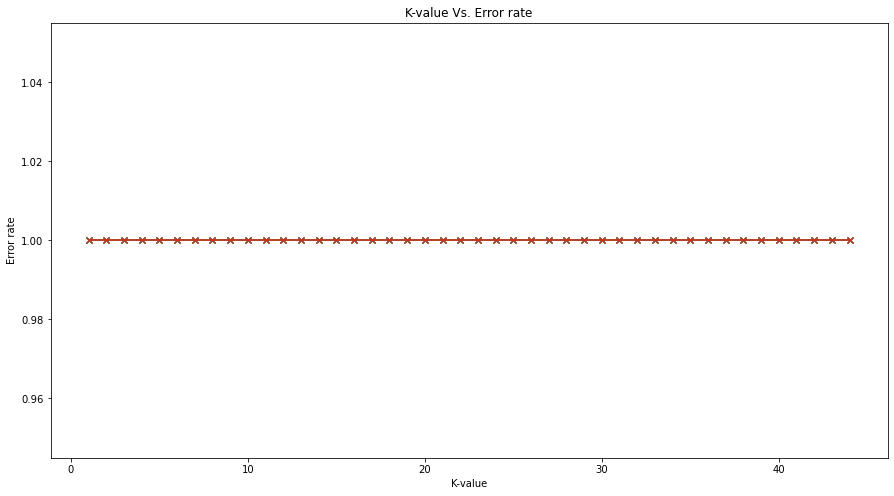

In [81]:
error_rate=[]

for i in range(1,45):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i) != y_test)
    
plt.figure(figsize=(15,8))
plt.plot(range(1,45),error_rate,marker='x')
plt.title('K-value Vs. Error rate')
plt.xlabel('K-value')
plt.ylabel('Error rate')

In [82]:
KN=np.arange(1,35)
train_acc=np.empty(len(KN))
test_acc=np.empty(len(KN))

for i,k in enumerate(KN):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_acc[i]=knn.score(x_train,y_train)
    test_acc[i]=knn.score(x_test,y_test)

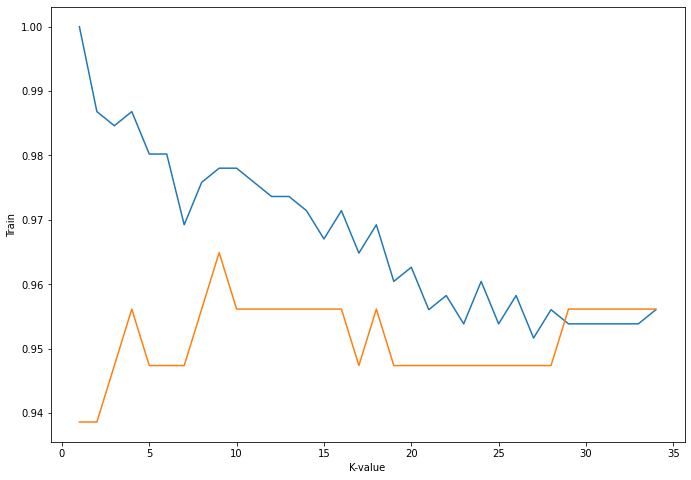

In [93]:
plt.figure(figsize=(25,8))
a=np.arange(1,35)
plt.subplot(1,2,1)
plt.plot(a,train_acc)
plt.xlabel('K-value')
plt.ylabel('Train')
plt.plot(a,test_acc)

In [84]:
dex=np.where(test_acc==max(test_acc))
f=j[dex]
f

array([9])

In [85]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [94]:
y_pred=model.predict(x_test)

In [95]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [98]:
print(classification_report(y_test,y_pred,target_names=['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.95      0.95      0.95        43
      Benign       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

